In [1]:
from itertools import cycle
import warnings
warnings.filterwarnings(action='ignore', category=RuntimeWarning)

from matplotlib import pyplot as plt
import numpy as np

from sklearn.base import clone
from sklearn.datasets import load_breast_cancer, load_digits, make_moons, make_classification

from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC

import active_learning
from active_learning.active_learning import _actively_learn as actively_learn
from active_learning.utils import *
from active_learning.query_strats import random_sampling, uncertainty_sampling, active_search

%matplotlib inline
%load_ext autoreload
%autoreload 2
%aimport active_learning

# Load toy data

In [2]:
# we'll turn this into a binary classification task looking for the twos
# X, y = load_digits(return_X_y=True)
# y = (y == 2).astype(int)
X, y = make_moons(n_samples=200)
# X, y = make_classification(n_samples=200, n_features=2, n_redundant=0, n_informative=2, n_clusters_per_class=1)

# Training Models

In [9]:
# use KNN with 5 neighbors as base classifier to actively learn
# base_clf = KNeighborsClassifier()
base_clf = SVC(probability=True)

# Make 30 queries
train_size = 30

# set random state for consistency in training data
random_state = 0

### Random Sampling

In [10]:
# I'm setting init_L_size to 5 because KNN can't be fit to fewer than n_neighbors points
random_experiment_data = perform_experiment(
    X, y, 
    base_estimator=clone(base_clf), 
    query_strat=random_sampling,
    n_queries=train_size,
    init_L_size=5,
    random_state=random_state
)

100%|██████████| 30/30 [00:00<00:00, 911.25it/s]


### Uncertainty Sampling

In [11]:
uncertainty_experiment_data = perform_experiment(
    X, y,
    base_estimator=clone(base_clf),
    query_strat=uncertainty_sampling,
    n_queries=train_size,
    init_L_size=5,
    random_state=random_state
)

100%|██████████| 30/30 [00:00<00:00, 729.68it/s]


### Active Search

In [12]:
as_experiment_data = perform_experiment(
    X, y,
    base_estimator=clone(base_clf),
    query_strat=active_search,
    n_queries=train_size,
    init_L_size=5,
    random_state=random_state
)

100%|██████████| 30/30 [00:11<00:00,  2.51it/s]


# Compare

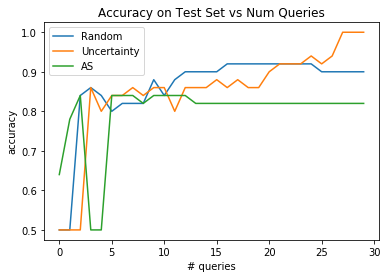

In [13]:
plt.plot(np.arange(train_size), random_experiment_data["accuracy"], label="Random")
plt.plot(np.arange(train_size), uncertainty_experiment_data["accuracy"], label="Uncertainty")
plt.plot(np.arange(train_size), as_experiment_data["accuracy"], label="AS")

plt.title("Accuracy on Test Set vs Num Queries")
plt.ylabel("accuracy")
plt.xlabel("# queries")
plt.legend()

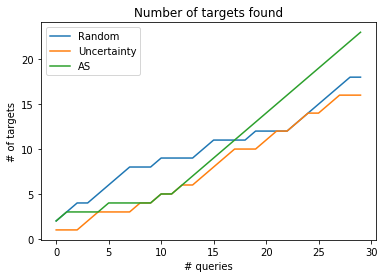

In [14]:
plt.plot(np.arange(train_size), random_experiment_data["history"], label="Random")
plt.plot(np.arange(train_size), uncertainty_experiment_data["history"], label="Uncertainty")
plt.plot(np.arange(train_size), as_experiment_data["history"], label="AS")

plt.title("Number of targets found")
plt.ylabel("# of targets")
plt.xlabel("# queries")
plt.legend()